In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2

import os
from os import listdir
import glob
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data_dir = 'E:/AVID/Data Science/Dataset/Brain Tumor Detection v1/brain_tumor_dataset'

In [3]:
print(listdir(data_dir))

['no', 'yes']


In [4]:
no_tumor = os.path.join(data_dir, 'no')
count_no_tumor = glob.glob(no_tumor + '/*')
print(f'jumlah no: {len(count_no_tumor)}')

yes_tumor = os.path.join(data_dir, 'yes')
count_yes_tumor = glob.glob(yes_tumor + '/*')
print(f'jumlah yes: {len(count_yes_tumor)}')

jumlah no: 98
jumlah yes: 155


In [5]:
img_no = PIL.Image.open(str(count_no_tumor[0])).resize((224, 224))
img_yes = PIL.Image.open(str(count_yes_tumor[0])).resize((224, 224))

Text(0.5, 1.0, 'yes tumor')

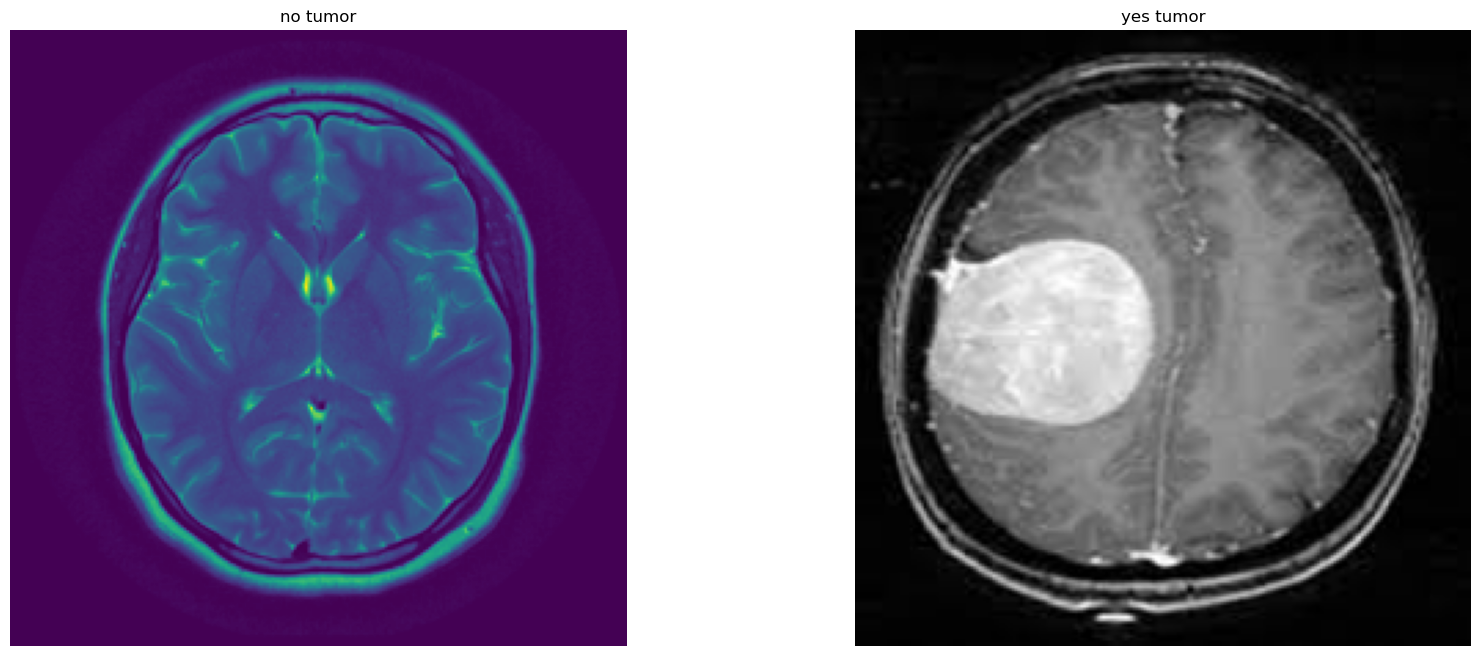

In [6]:
fig = plt.figure(figsize=(20, 8))

fig.add_subplot(1, 2, 1)
plt.imshow(img_no)
plt.axis('off')
plt.title('no tumor')

fig.add_subplot(1, 2, 2)
plt.imshow(img_yes)
plt.axis('off')
plt.title('yes tumor')

In [7]:
print(type(count_no_tumor))

<class 'list'>


image_i : E:/AVID/Data Science/Dataset/Brain Tumor Detection v1/brain_tumor_dataset\no\1 no.jpeg
image_i : E:/AVID/Data Science/Dataset/Brain Tumor Detection v1/brain_tumor_dataset\no\10 no.jpg


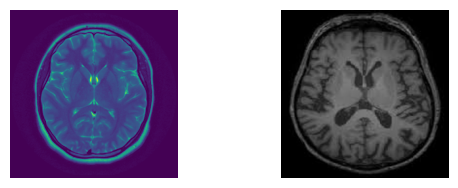

In [8]:
for i, images in enumerate (count_no_tumor[:2]):
    image_i = PIL.Image.open(images).resize((256, 256))
    print(f'image_i : {images}')
    ax = plt. subplot(2, 2, i + 1)
    plt.imshow(image_i)
    plt.axis('off')
    

In [9]:
def data_generator(data_dir):
    labels = {}
    image_data = {}
    class_dir = listdir(data_dir)
    for i in class_dir:
        labels[i] = [0 for j in range(len(glob.glob(data_dir + '/' + i + '/*')))]
        image_data[i] =  glob.glob(data_dir + '/' + i + '/*')
        image_data[i] = pd.DataFrame(image_data[i])
    
    return labels, image_data

In [10]:
batch_size = 32
img_height = 128
img_width = 128

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


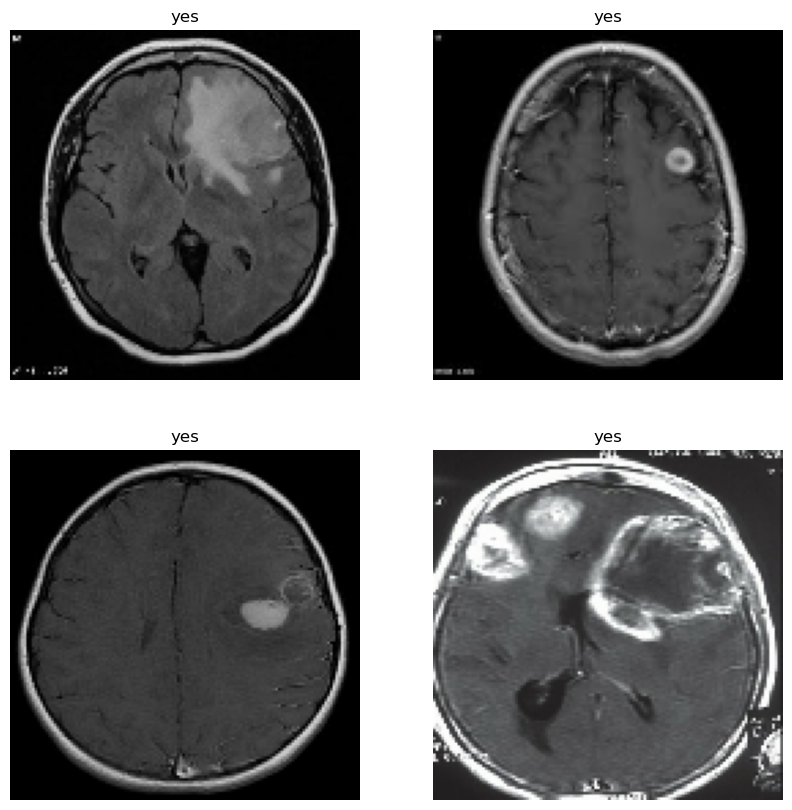

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [19]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = len(class_names)

In [22]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(num_classes)
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [25]:
model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
epochs = 100
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/100
7/7 [==============================] - 12s 843ms/step - loss: 2.9002 - accuracy: 0.4039 - val_loss: 3.2753 - val_accuracy: 0.3941
Epoch 2/100
7/7 [==============================] - 5s 671ms/step - loss: 3.2777 - accuracy: 0.3941 - val_loss: 3.2389 - val_accuracy: 0.3941
Epoch 3/100
7/7 [==============================] - 5s 765ms/step - loss: 3.2423 - accuracy: 0.3941 - val_loss: 3.2460 - val_accuracy: 0.3941
Epoch 4/100
7/7 [==============================] - 5s 692ms/step - loss: 3.2093 - accuracy: 0.3941 - val_loss: 3.2114 - val_accuracy: 0.3941
Epoch 5/100
7/7 [==============================] - 4s 593ms/step - loss: 3.1996 - accuracy: 0.3941 - val_loss: 3.1828 - val_accuracy: 0.3941
Epoch 6/100
7/7 [==============================] - 4s 573ms/step - loss: 3.1753 - accuracy: 0.3941 - val_loss: 3.1517 - val_accuracy: 0.3941
Epoch 7/100
7/7 [==============================] - 4s 624ms/step - loss: 3.1412 - accuracy: 0.3941 - val_loss: 3.1198 - val_accuracy: 0.3941
Epoch 8/100


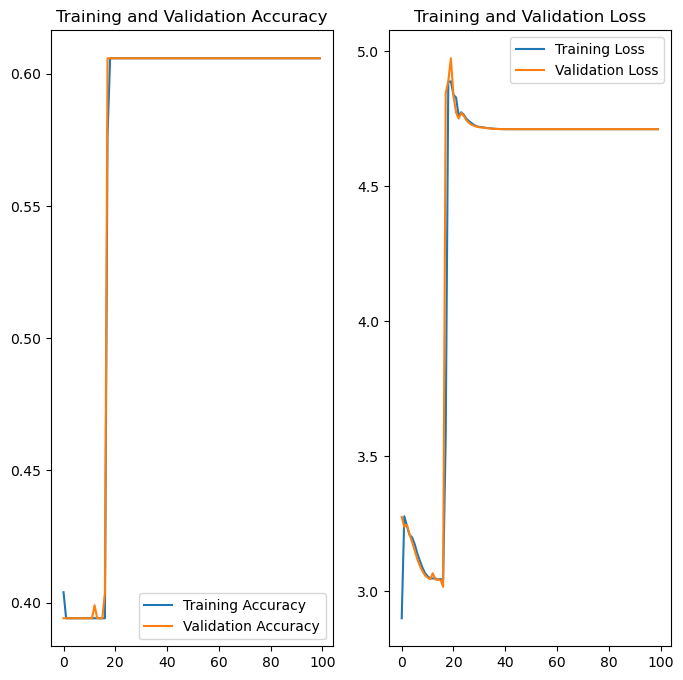

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [44]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(num_classes)
])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                

In [46]:
opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)

In [47]:
model.compile(optimizer=opt, loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
epochs = 100
history2 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/100


7/7 [==============================] - 10s 764ms/step - loss: 0.8403 - accuracy: 0.4089 - val_loss: 1.2383 - val_accuracy: 0.5862
Epoch 2/100
7/7 [==============================] - 5s 696ms/step - loss: 0.8950 - accuracy: 0.5813 - val_loss: 0.5966 - val_accuracy: 0.6059
Epoch 3/100
7/7 [==============================] - 5s 712ms/step - loss: 0.6197 - accuracy: 0.6256 - val_loss: 0.6180 - val_accuracy: 0.7094
Epoch 4/100
7/7 [==============================] - 5s 723ms/step - loss: 0.6176 - accuracy: 0.5419 - val_loss: 0.5759 - val_accuracy: 0.6700
Epoch 5/100
7/7 [==============================] - 5s 718ms/step - loss: 0.5735 - accuracy: 0.6601 - val_loss: 0.5754 - val_accuracy: 0.7389
Epoch 6/100
7/7 [==============================] - 5s 714ms/step - loss: 0.5706 - accuracy: 0.6158 - val_loss: 0.5575 - val_accuracy: 0.5320
Epoch 7/100
7/7 [==============================] - 5s 750ms/step - loss: 0.5562 - accuracy: 0.5025 - val_loss: 0.5367 - val_accuracy: 0.7044
Epoch 8/100
7/7 [=======

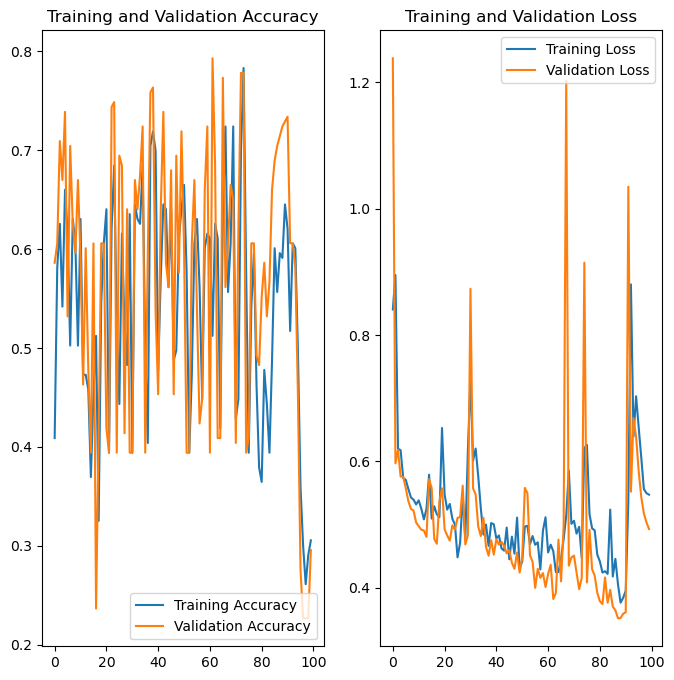

In [49]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()